In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [297]:
col_names = pd.read_csv('../data/data.csv', nrows=0).columns
dtype_map = {'class' : np.int16, 'year' : np.int16}
dtype_map.update({col: np.float64 for col in col_names if col not in dtype_map})

dtf = pd.read_csv('../data/data.csv', dtype=dtype_map)
al = dtf.shape[0]
print(f"Выборка: {al}")
dtf.drop_duplicates(keep=False, inplace=False)
print(f"Количество дубликатов {al - dtf.shape[0]}")

Выборка: 43405
Количество дубликатов 0


In [4]:
percent_missing = dtf.isnull().sum() / dtf.shape[0] * 100.00
missing_value_df = pd.DataFrame({'column_name': dtf.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Attr1,Attr1,0.018778
Attr2,Attr2,0.018778
Attr3,Attr3,0.018778
Attr4,Attr4,0.309837
Attr5,Attr5,0.208905
...,...,...
Attr62,Attr62,0.288712
Attr63,Attr63,0.309837
Attr64,Attr64,1.868413
class,class,0.000000


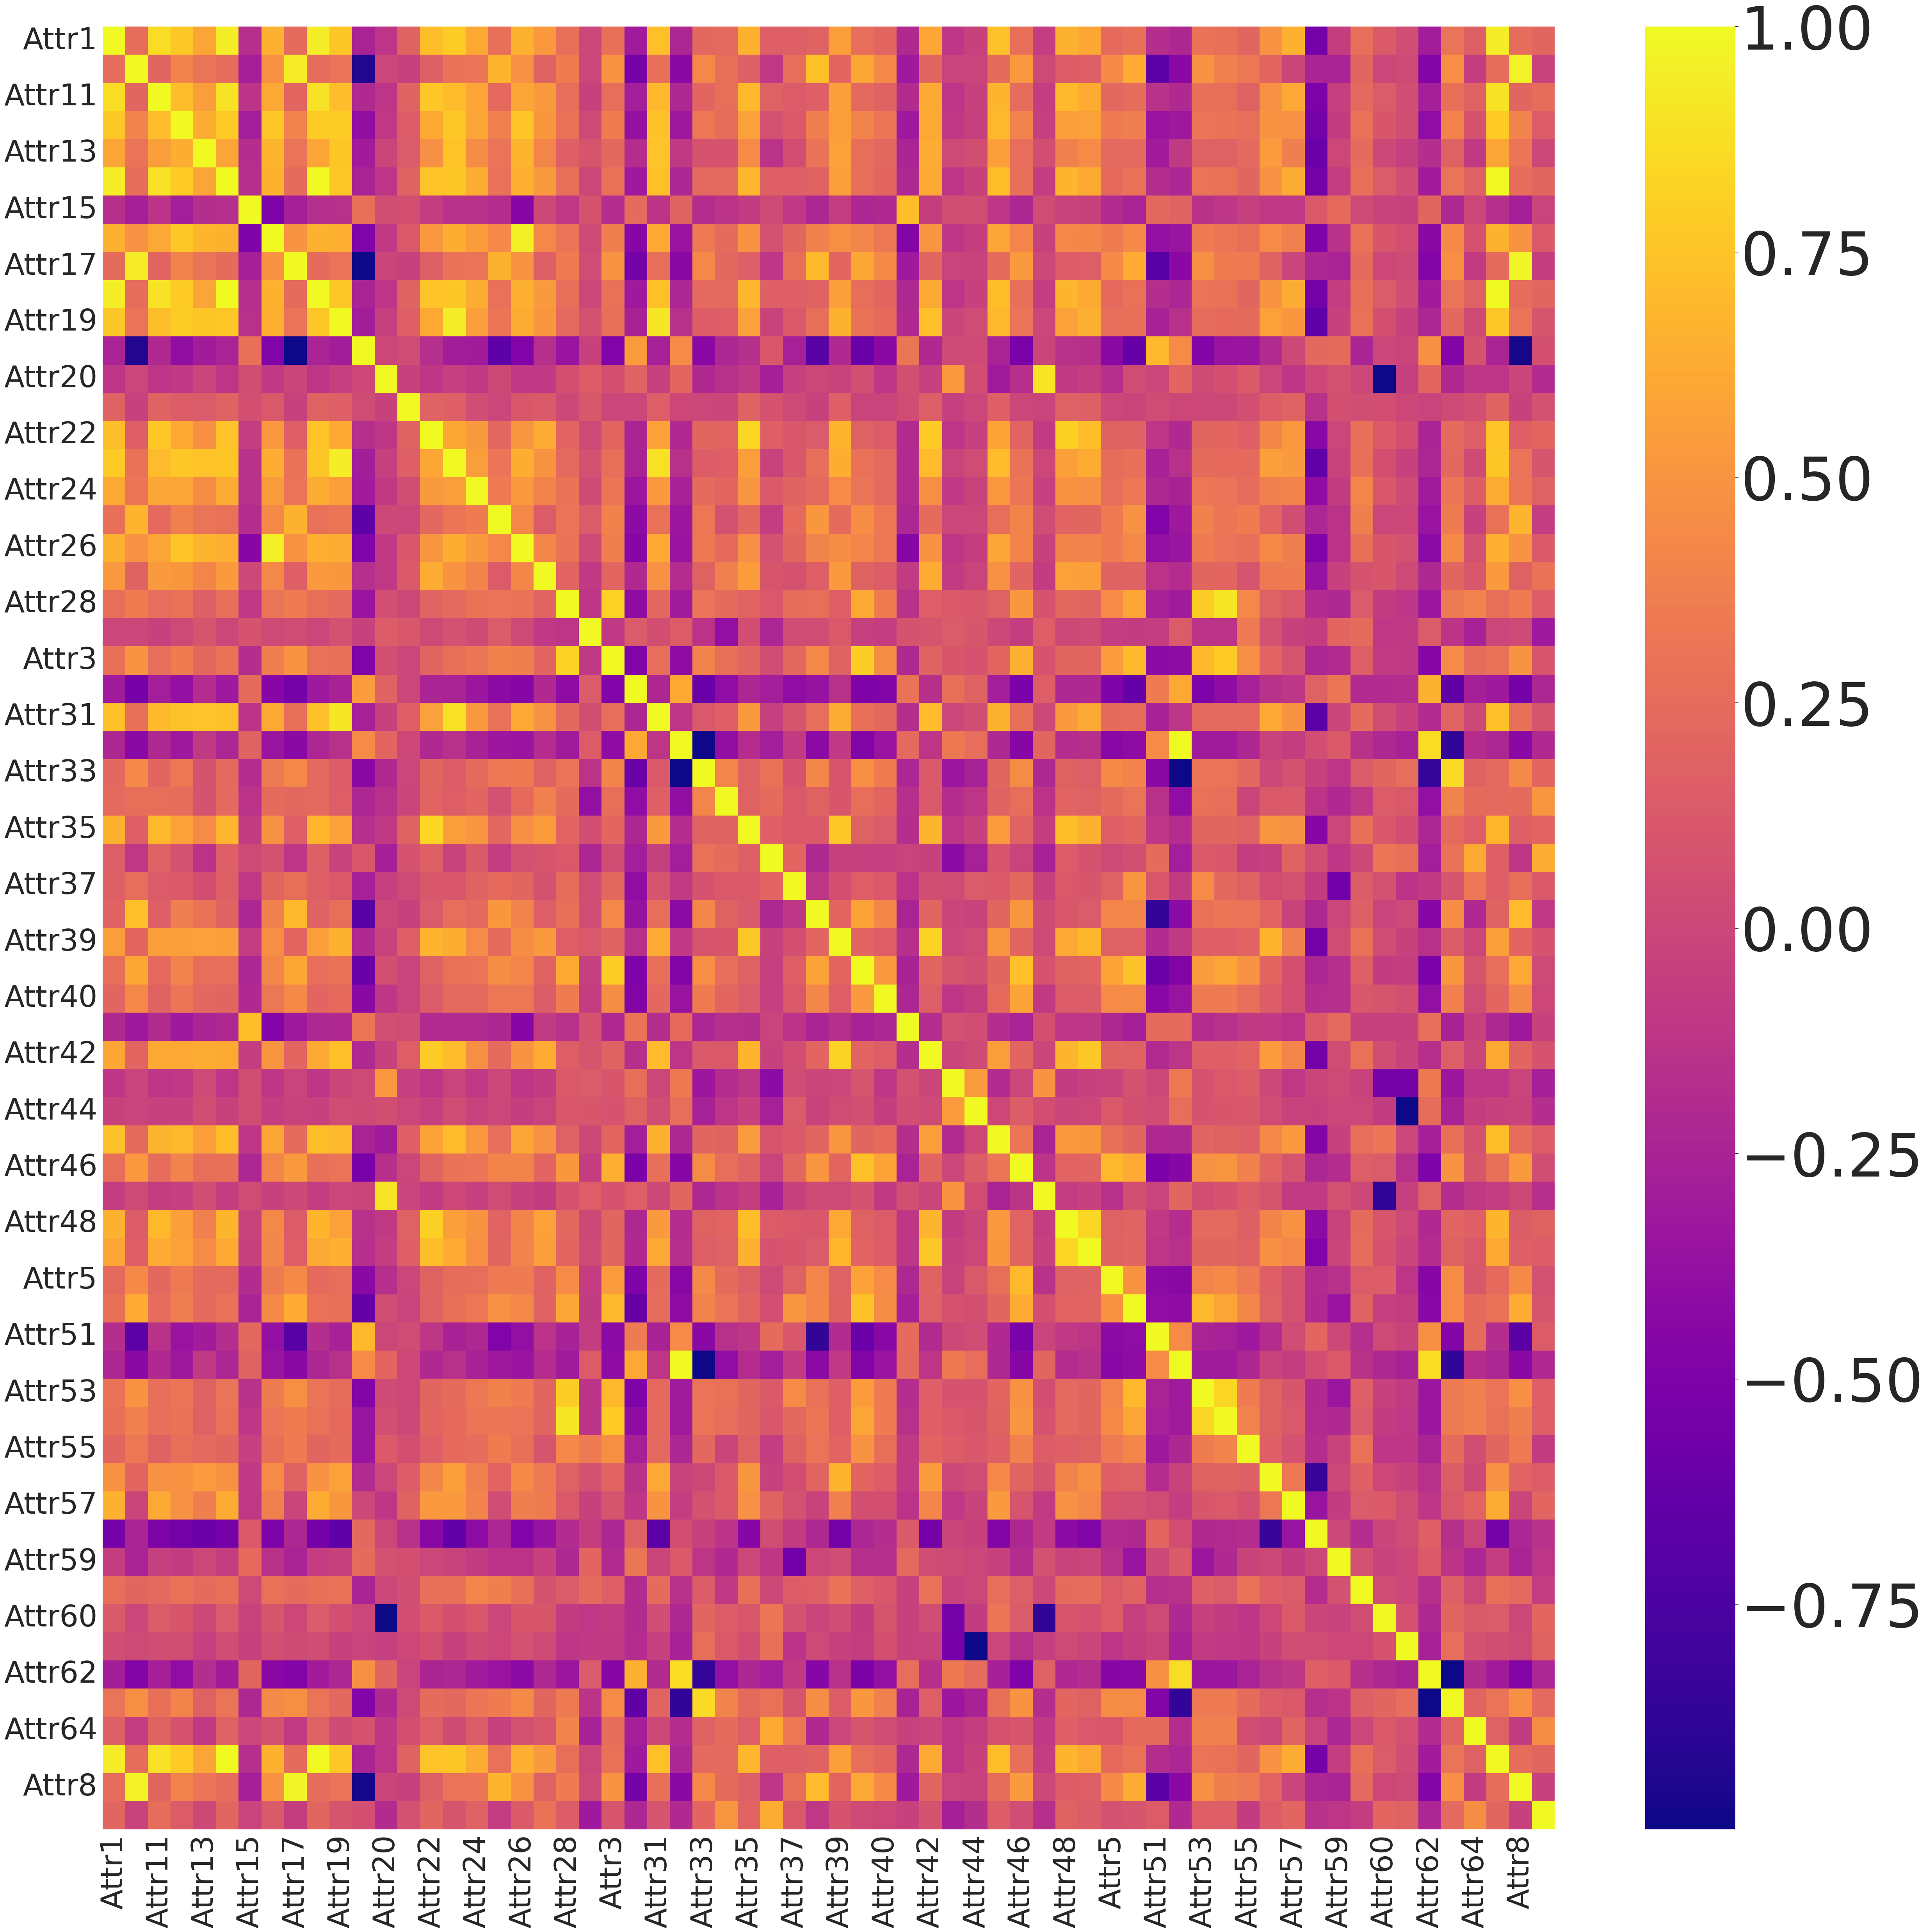

In [83]:
fig, ax = plt.subplots(figsize=(60, 60))
sns.set(font_scale=10)
d = dtf[dtf.columns.difference(['class', 'year'])]
correlation_matrix = d.corr(method='kendall')
sns.heatmap(correlation_matrix, ax=ax, cmap="plasma", fmt="d")
ax.set_ylabel('')
ax.set_xlabel('')
plt.show()

<AxesSubplot: xlabel='year', ylabel='Count'>

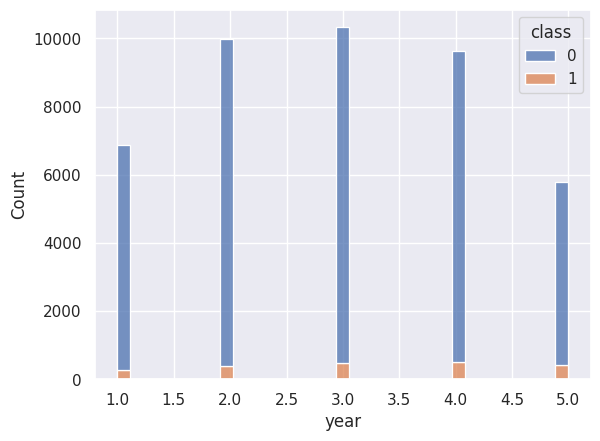

In [84]:
sns.set(font_scale=1)
sns.histplot(
    data=dtf,
    x='year',
    hue='class',
    multiple='stack'
)

<AxesSubplot: xlabel='class', ylabel='year'>

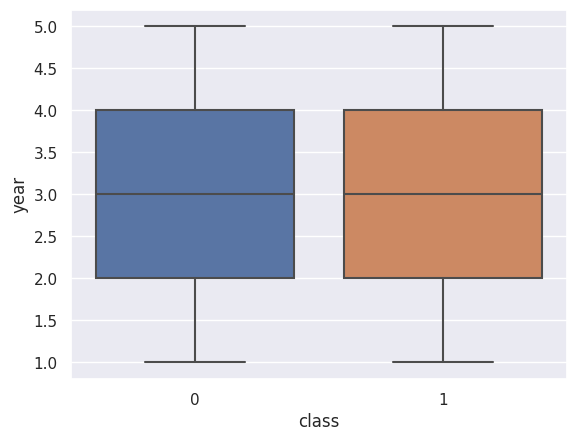

In [59]:
sns.boxplot(data=dtf, x='class', y='year')

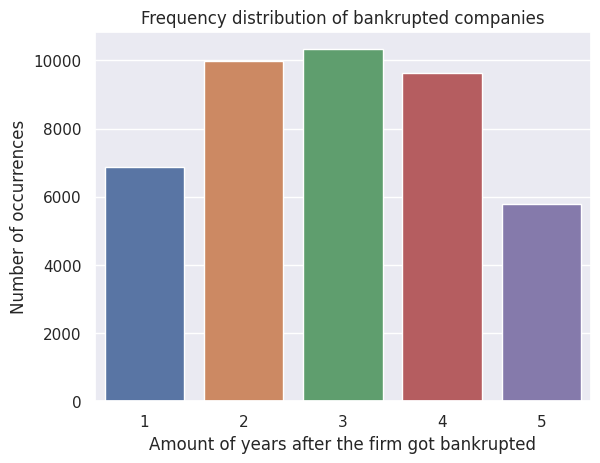

In [85]:

temp = dtf[dtf['year'] > 0]
count = temp['year'].value_counts()
del temp
sns.barplot(x=count.index, y=count.values)
plt.title('Frequency distribution of bankrupted companies')
plt.ylabel('Number of occurrences')
plt.xlabel('Amount of years after the firm got bankrupted')
plt.show()

<AxesSubplot: xlabel='class', ylabel='Attr6'>

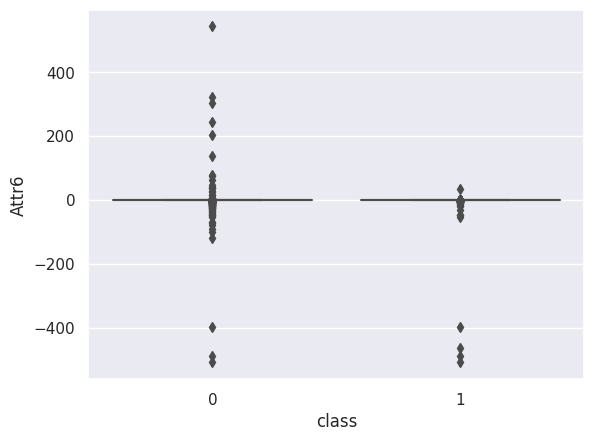

In [88]:
sns.boxplot(data=dtf, x='class', y='Attr6')

In [ ]:
sns.boxplot(data=dtf, x='class', y='Attr7')

<AxesSubplot: xlabel='class', ylabel='count'>

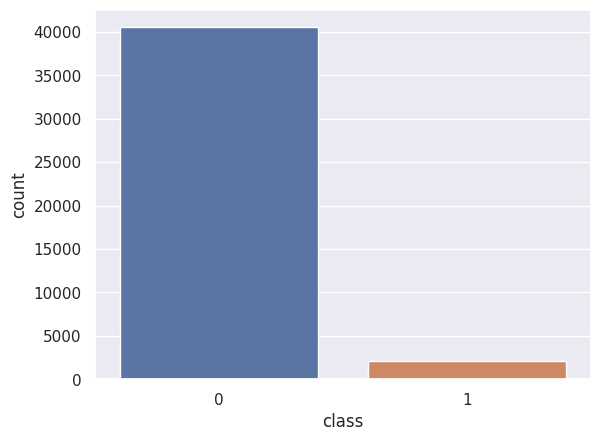

In [89]:
sns.countplot(x=dtf['class'])

<AxesSubplot: xlabel='year', ylabel='count'>

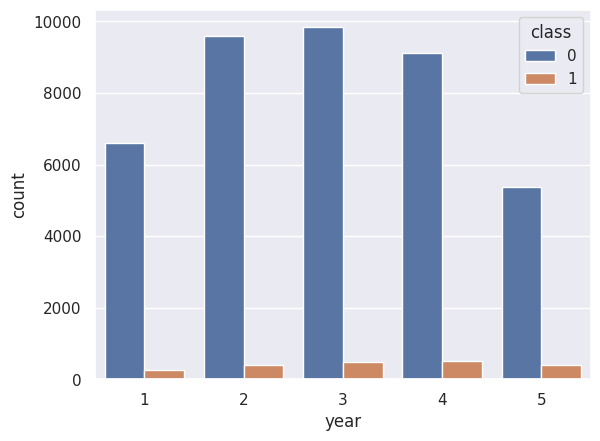

In [102]:
sns.countplot(x=dtf['year'], hue=dtf['class'])

<AxesSubplot: xlabel='year', ylabel='Attr7'>

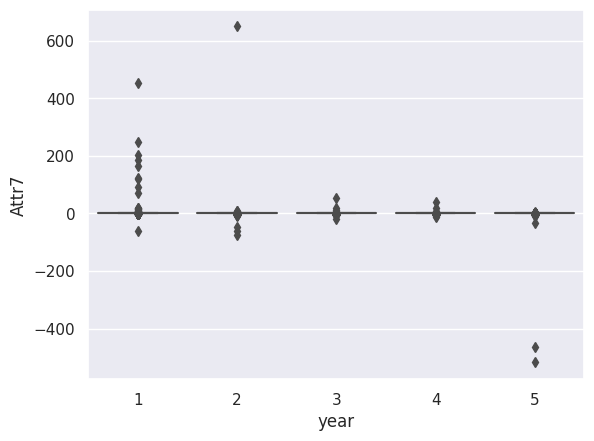

In [94]:
sns.boxplot(data=dtf, x='year', y='Attr7')

<AxesSubplot: xlabel='year', ylabel='Attr8'>

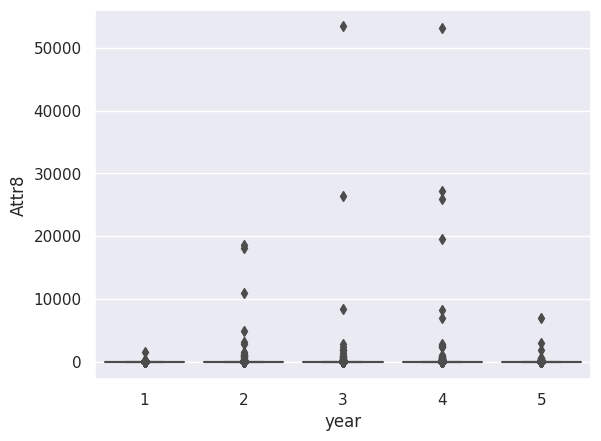

In [95]:
sns.boxplot(data=dtf, x='year', y='Attr8')

<AxesSubplot: xlabel='year', ylabel='Attr9'>

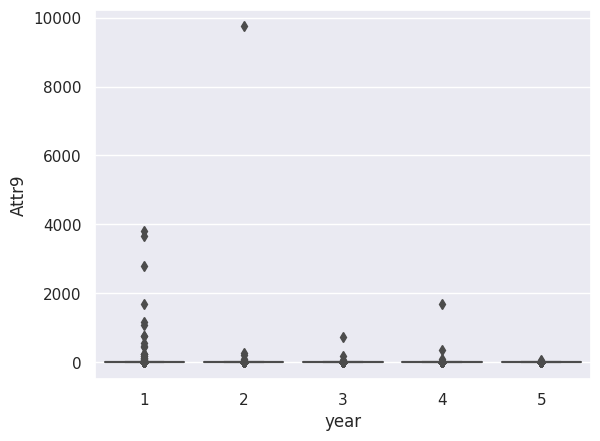

In [96]:
sns.boxplot(data=dtf, x='year', y='Attr9')

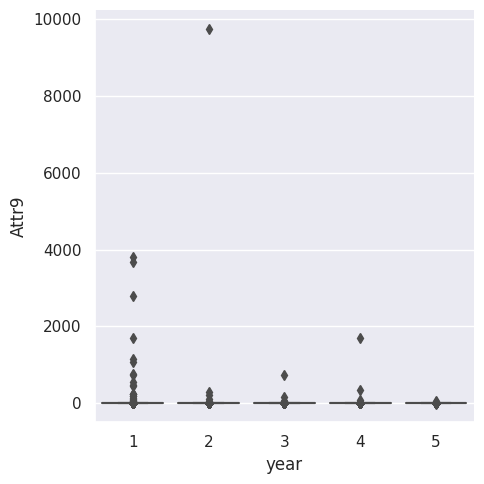

In [101]:
sns.catplot(data=dtf, x="year", y="Attr9", kind="box")


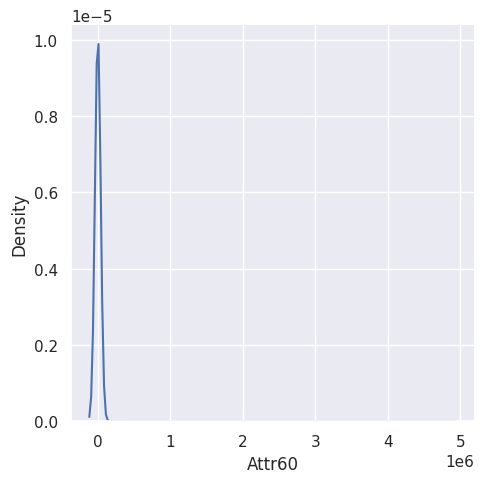

In [139]:
sns.displot(dtf, x='Attr60', kind='kde', bw_adjust=10)

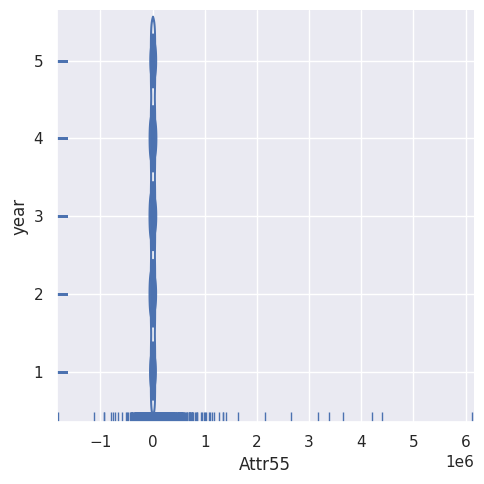

In [141]:
sns.displot(
    dtf, x="Attr55", y="year",
    kind="kde", rug=True
)

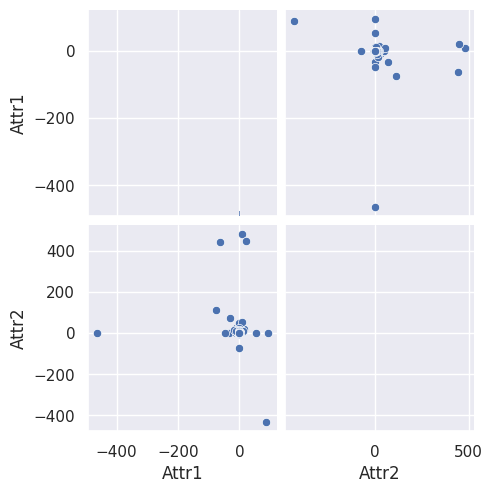

In [176]:
sns.pairplot(dtf[['Attr1', 'Attr2']])

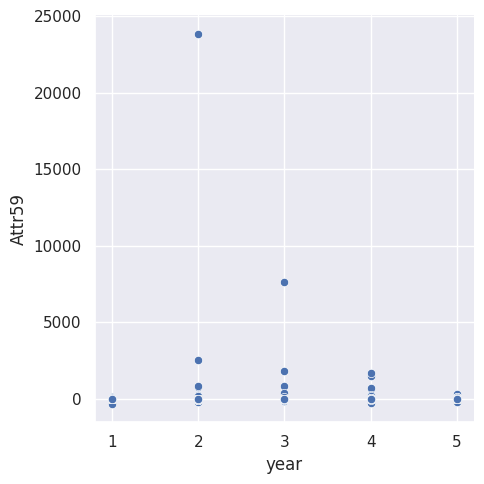

In [156]:
sns.relplot(data=dtf, x="year", y="Attr59")

<AxesSubplot: xlabel='year', ylabel='Attr64'>

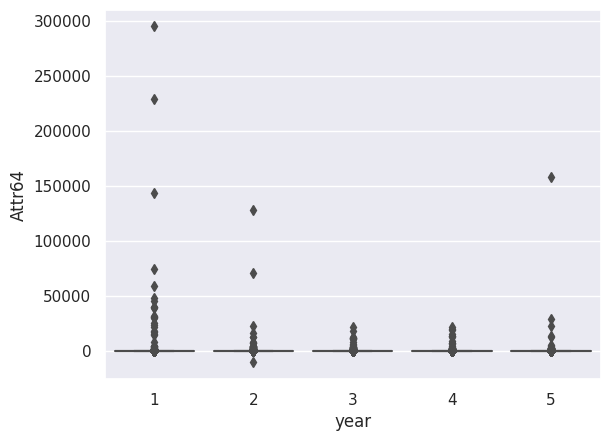

In [173]:
sns.boxplot(data=dtf, y='Attr64', x='year')

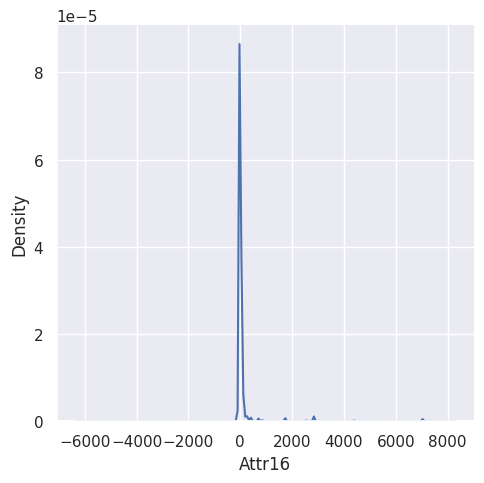

In [259]:
sns.displot(data=dtf, x='Attr16', kind='kde')

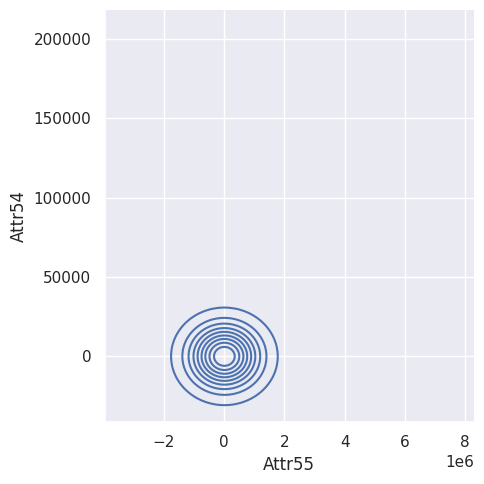

In [257]:
sns.displot(data=dtf, x='Attr55', y='Attr54', kind='kde', bw_adjust=60)

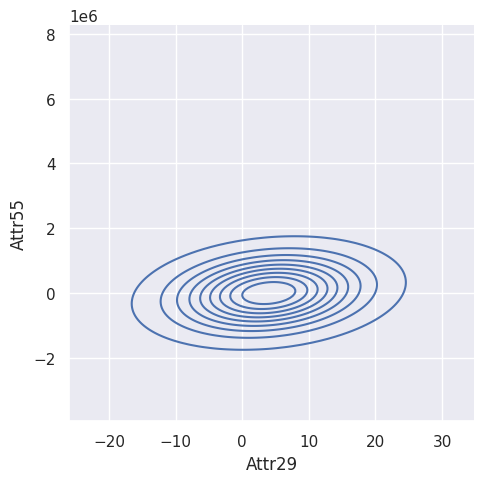

In [258]:
sns.displot(data=dtf, x='Attr29', y='Attr55', kind='kde', bw_adjust=60)

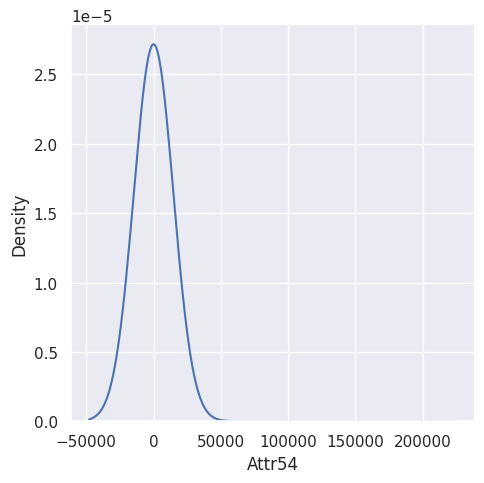

In [265]:
sns.displot(data=dtf, x='Attr54', kind='kde', bw_adjust=100)

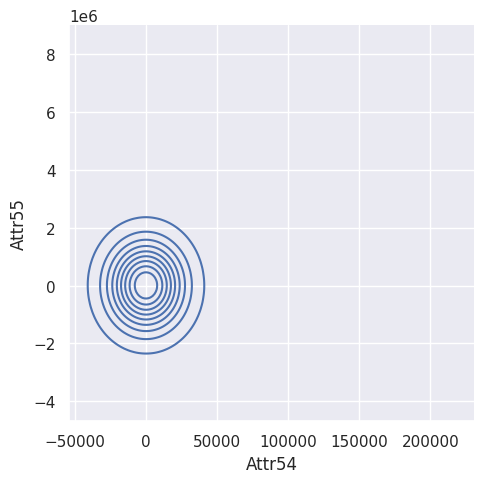

In [268]:
sns.displot(data=dtf, x='Attr54', y='Attr55', kind='kde', bw_adjust=80)

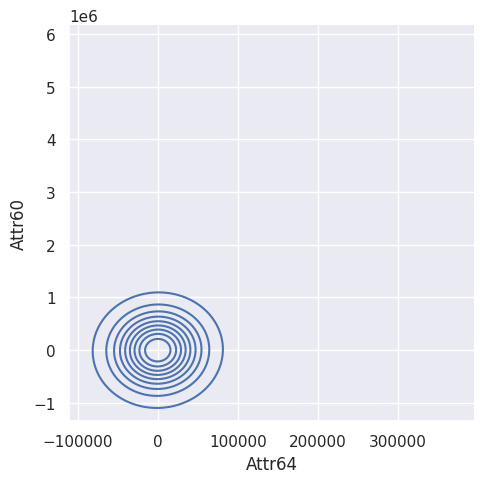

In [269]:
sns.displot(data=dtf, x='Attr64', y='Attr60', kind='kde', bw_adjust=80)

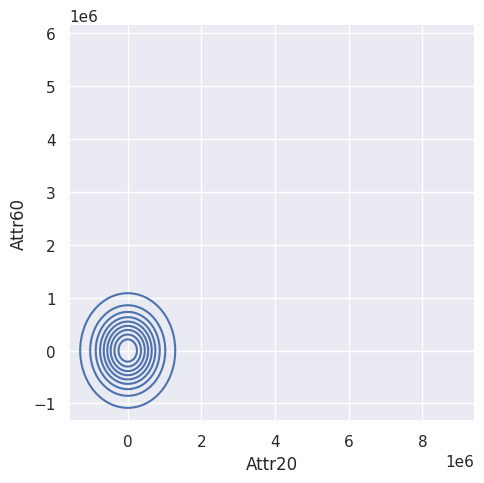

In [270]:
sns.displot(data=dtf, x='Attr20', y='Attr60', kind='kde', bw_adjust=80)

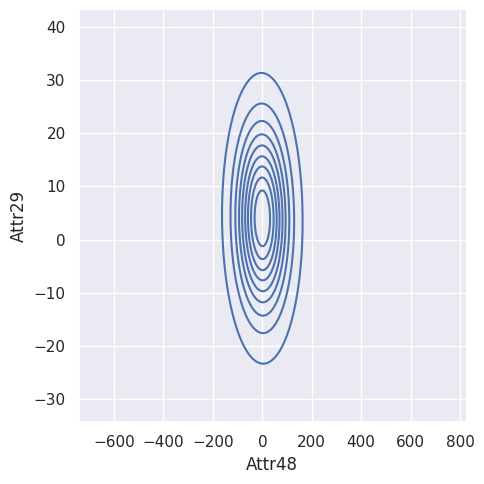

In [275]:
sns.displot(data=dtf, x='Attr48', y='Attr29', kind='kde', bw_adjust=80)

In [276]:
d = dtf.drop_duplicates(keep=False)
len(d)

42603

In [298]:
dtf = dtf.drop_duplicates(keep=False)

In [279]:
# Missing values
missing_values_count = dtf.isnull().sum()
total_cells = np.product(dtf.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
percent_missing

1.449321750708977

In [284]:
missing_values_count[20:40]

Attr21     5818
Attr22        8
Attr23      123
Attr24      922
Attr25        8
Attr26       93
Attr27     2736
Attr28      796
Attr29        8
Attr30      123
Attr31      123
Attr32      364
Attr33      132
Attr34       92
Attr35        8
Attr36        8
Attr37    18688
Attr38        8
Attr39      123
Attr40      132
dtype: int64

In [301]:
missing_values_count.sum()

40752

In [299]:
dtf.bfill(axis='rows', inplace=True)

In [300]:
dtf.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,year
count,42603.000000,42603.000000,42603.000000,42603.000000,4.260300e+04,42603.000000,42603.000000,42603.000000,42603.000000,42603.000000,...,42603.000000,4.260300e+04,42603.000000,4.260300e+04,42603.000000,4.260300e+04,42603.000000,42603.000000,42603.000000,42603.000000
mean,0.046501,0.593542,0.112892,6.389131,-3.857995e+02,-0.059119,0.102488,11.418326,2.495867,0.582453,...,-0.009493,3.051684e+01,1.342604,4.536488e+02,17.270078,1.512959e+03,9.415405,71.678941,0.048705,2.941060
std,2.455976,5.896766,5.489737,297.761770,6.174783e+04,7.268017,5.617630,467.971313,57.704495,13.221040,...,13.796300,5.379217e+03,123.235077,3.197708e+04,557.882491,1.403583e+05,125.178843,2364.329083,0.215254,1.282619
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000,0.000000,1.000000
25%,0.003344,0.270980,0.021561,1.049700,-4.912450e+01,0.000000,0.005695,0.426980,1.019200,0.293790,...,0.014871,8.760400e-01,0.000000,5.552350e+00,4.522600,4.200700e+01,3.102000,2.189050,0.000000,2.000000
50%,0.049658,0.473050,0.197170,1.569800,-7.372800e-01,0.000000,0.059563,1.064500,1.202200,0.504680,...,0.120410,9.511800e-01,0.005985,9.812000e+00,6.657400,7.119300e+01,5.098500,4.327900,0.000000,3.000000
75%,0.129870,0.690115,0.403945,2.784200,5.090400e+01,0.086101,0.151275,2.589400,2.077900,0.707240,...,0.286235,9.927200e-01,0.237005,2.037650e+01,10.450500,1.169800e+02,8.628150,9.905250,0.000000,4.000000
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000,1.000000,5.000000


In [305]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

X = dtf.drop('class', axis = 1)
y = dtf['class']

mi_scores = make_mi_scores(X, y)
mi_scores[::10] 

Attr37    0.061781
Attr13    0.013472
Attr25    0.009760
Attr17    0.008132
Attr50    0.006451
Attr32    0.003060
Attr44    0.001135
Name: MI Scores, dtype: float64

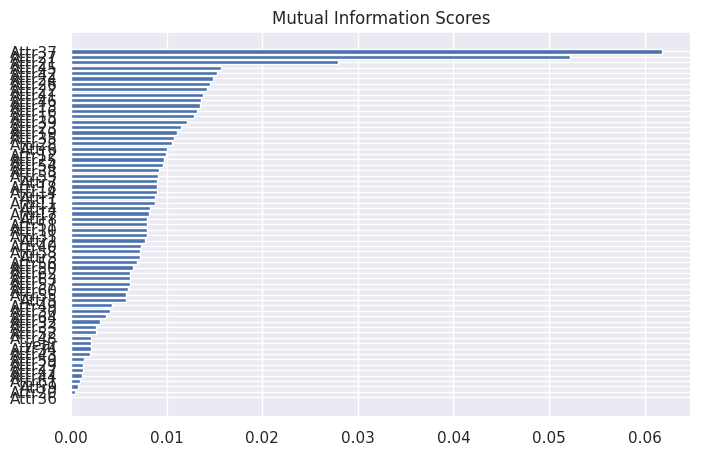

In [306]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)